In [ ]:
import os
import numpy as np
import matplotlib
import torch
!pip install mat73
import mat73
import matplotlib.pyplot as plt
import csv
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split,TensorDataset
from torchvision import transforms, utils
import time
import pandas as pd
import scipy.io
import sklearn.metrics
import seaborn as sns
import random
from sklearn.model_selection import train_test_split


from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
random.seed(1)
torch.manual_seed(1)
torch.cuda.manual_seed(1)
np.random.seed(1)

from scipy import signal

from sklearn.metrics import confusion_matrix

import seaborn as sn
import pandas as pd

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedGroupKFold
from sklearn.model_selection import LeaveOneGroupOut






In [ ]:
class Net2_stft(nn.Module):
    def __init__(self,in_channels, num_classes):
        super(Net2_stft,self).__init__()
        n_ch = in_channels  # channel of input 
        n1 = 200  # This directly affects accuracy if value is low.
        n2 = 200
        n3 = 100
        n4 = 50
        n5=50
        n_l1=7200
        n_l2=200
       
      
        self.conv1 = nn.Conv2d(n_ch, n1, 5)
        self.bn1 = nn.BatchNorm2d(n1)
        #self.pool1 = nn.MaxPool1d(2)
        self.conv2 = nn.Conv2d(n1, n2, 3)
        
        self.bn2 = nn.BatchNorm2d(n2)
        self.conv3 = nn.Conv2d(n2, n3, 2,2)
        self.bn3 = nn.BatchNorm2d(n3)
        self.conv4 = nn.Conv2d(n3, n4, 2,2)
        self.bn4 = nn.BatchNorm2d(n4)
        self.fc1 = nn.Linear(n_l1, n_l2)
        self.fc2 = nn.Linear(n_l2, num_classes)
       


    def forward(self, x):
      
        x = self.conv1(x)
        x = F.relu(self.bn1(x))
        #x = self.pool1(x)
        #print(x.shape)
        x = self.conv2(x)
        x = F.relu(self.bn2(x))
        #print(x.shape)
        x = self.conv3(x)
        x = F.relu(self.bn3(x))
        #print(x.shape)
        x = self.conv4(x)
        x = F.relu(self.bn4(x))
        # x = self.conv5(x)
        # x = F.relu(self.bn5(x))
        # x = self.pool1(x)
        #print(x.shape)
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        #print(x.shape)
        x = F.relu(self.fc1(x))
       
        x = self.fc2(x)
       
        
        return x

class Net2_stft2(nn.Module):
    def __init__(self,in_channels, num_classes):
        super(Net2_stft2,self).__init__()
        n_ch = in_channels  # channel of input 
        n1 = 200  # This directly affects accuracy if value is low.
        n2 = 200
        n3 = 100
        n4 = 50
    
        n_l1=3200
        n_l2=200
       
      
        self.conv1 = nn.Conv2d(n_ch, n1, 5)
        self.bn1 = nn.BatchNorm2d(n1)
        #self.pool1 = nn.MaxPool1d(2)
        self.conv2 = nn.Conv2d(n1, n2, 3)
        
        self.bn2 = nn.BatchNorm2d(n2)
        self.conv3 = nn.Conv2d(n2, n3, 2,2)
        self.bn3 = nn.BatchNorm2d(n3)
        self.conv4 = nn.Conv2d(n3, n4, 2,2)
        self.bn4 = nn.BatchNorm2d(n4)
        self.fc1 = nn.Linear(n_l1, n_l2)
        self.fc2 = nn.Linear(n_l2, num_classes)
       


    def forward(self, x):
      
        x = self.conv1(x)
        x = F.relu(self.bn1(x))
        #x = self.pool1(x)
        #print(x.shape)
        x = self.conv2(x)
        x = F.relu(self.bn2(x))
        #print(x.shape)
        x = self.conv3(x)
        x = F.relu(self.bn3(x))
        #print(x.shape)
        x = self.conv4(x)
        x = F.relu(self.bn4(x))
        # x = self.conv5(x)
        # x = F.relu(self.bn5(x))
        # x = self.pool1(x)
        #print(x.shape)
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        #print(x.shape)
        x = F.relu(self.fc1(x))
       
        x = self.fc2(x)
       
        
        return x
class Net2_stft3(nn.Module):
    def __init__(self,in_channels, num_classes):
        super(Net2_stft3,self).__init__()
        n_ch = in_channels  # channel of input 
        n1 = 200  # This directly affects accuracy if value is low.
        n2 = 200
        n3 = 100
        n4 = 50
    
        n_l1=5000
        n_l2=200
       
      
        self.conv1 = nn.Conv2d(n_ch, n1, 5)
        self.bn1 = nn.BatchNorm2d(n1)
        self.pool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(n1, n2, 3)
        
        self.bn2 = nn.BatchNorm2d(n2)
        self.conv3 = nn.Conv2d(n2, n3, 2,2)
        self.bn3 = nn.BatchNorm2d(n3)
        self.conv4 = nn.Conv2d(n3, n4, 2,2)
        self.bn4 = nn.BatchNorm2d(n4)
        self.fc1 = nn.Linear(n_l1, n_l2)
        self.fc2 = nn.Linear(n_l2, num_classes)
       


    def forward(self, x):
      
        x = self.conv1(x)
        x = F.relu(self.bn1(x))
        #x = self.pool1(x)
        #print(x.shape)
        x = self.conv2(x)
        x = F.relu(self.bn2(x))
        #print(x.shape)
        x = self.conv3(x)
        x = F.relu(self.bn3(x))
        #print(x.shape)
        x = self.conv4(x)
        x = F.relu(self.bn4(x))
        # x = self.conv5(x)
        # x = F.relu(self.bn5(x))
        # x = self.pool1(x)
        #print(x.shape)
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        #print(x.shape)
        x = F.relu(self.fc1(x))
       
        x = self.fc2(x)
       
        
        return x


class Net2_cwt(nn.Module):
    def __init__(self,in_channels, num_classes):
        super(Net2_cwt,self).__init__()
        n_ch = in_channels  # channel of input 
        n1 = 200  # This directly affects accuracy if value is low.
        n2 = 100
        n3 = 50
        n4 = 50
       
 
        n_l1=4200
        n_l2=200
       
      
        self.conv1 = nn.Conv2d(n_ch, n1, (5, 3),2)
        self.bn1 = nn.BatchNorm2d(n1)
        #self.pool1 = nn.MaxPool1d(2)
        self.conv2 = nn.Conv2d(n1, n2, (5, 3),2)
        
        self.bn2 = nn.BatchNorm2d(n2)
        self.conv3 = nn.Conv2d(n2, n3, (5, 2))
        self.bn3 = nn.BatchNorm2d(n3)
        self.conv4 = nn.Conv2d(n3, n4, (5, 2))
        self.bn4 = nn.BatchNorm2d(n4)
        # self.conv5 = nn.Conv2d(n4, n5, 2)
        # self.bn5 = nn.BatchNorm2d(n5)
     
        
        self.fc1 = nn.Linear(n_l1, n_l2)
       
   
        self.fc2 = nn.Linear(n_l2, num_classes)
      
        


    def forward(self, x):
      
        x = self.conv1(x)
        x = F.relu(self.bn1(x))
        #x = self.pool1(x)
        #print(x.shape)
        x = self.conv2(x)
        x = F.relu(self.bn2(x))
        #print(x.shape)
        x = self.conv3(x)
        x = F.relu(self.bn3(x))
        #print(x.shape)
        x = self.conv4(x)
        x = F.relu(self.bn4(x))
        # x = self.conv5(x)
        # x = F.relu(self.bn5(x))
        # x = self.pool1(x)
        #print(x.shape)
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        #print(x.shape)
        x = F.relu(self.fc1(x))
       
        x = self.fc2(x)
       
        
        return x

# 1D CNN
class Net(nn.Module):
    def __init__(self,in_channels, num_classes):
        super(Net,self).__init__()
        
        n1 = 128 # This directly affects accuracy if value is low.
        n2 = 128
        n3 = 64
        n4 = 64
        
        n_l1=4544
        n_l2=200
       
        n_out =8   # output channel  (classification)
        oc = 2
        self.conv1 = nn.Conv1d(in_channels, n1, 100, 4)
        self.bn1 = nn.BatchNorm1d(n1)
        #self.pool1 = nn.MaxPool1d(2)
        self.conv2 = nn.Conv1d(n1, n2, 25,2)
        self.bn2 = nn.BatchNorm1d(n2)
        self.conv3 = nn.Conv1d(n2, n3, 5,2)
        self.bn3 = nn.BatchNorm1d(n3)
        self.conv4 = nn.Conv1d(n3, n4, 2,2)
        self.bn4 = nn.BatchNorm1d(n4)
        # self.conv5 = nn.Conv1d(n4, n5, 2,2)
        # self.bn5 = nn.BatchNorm1d(n5)
        #self.pool1=nn.AvgPool1d(2)
        #self.pool2=nn.MaxPool1d(2)
        
        self.fc1 = nn.Linear(n_l1, n_l2)
        self.fc2 = nn.Linear(n_l2, num_classes)
        


    def forward(self, x):
    
        x = self.conv1(x)
        x = F.relu(self.bn1(x))
        #x = self.pool1(x)
        #print(x.shape)
        x = self.conv2(x)
        x = F.relu(self.bn2(x))
        #print(x.shape)
        x = self.conv3(x)
        x = F.relu(self.bn3(x))
        #print(x.shape)
        x = self.conv4(x)
        x = F.relu(self.bn4(x))
        # x = self.conv5(x)
        # x = F.relu(self.bn5(x))
        #x = self.pool1(x)
        #print(x.shape)
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        #print(x.shape)
        x = F.relu(self.fc1(x))
       
        x = self.fc2(x)
       
        
        return x

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
from sklearn.model_selection import train_test_split
#file_name_train=r"/content/drive/My Drive/Colab Notebooks/RFMG/data/Data_allfilt_0.5_7.mat"
ExpVer='23g_3p_2_2'
ExpVer="17g_6g_1p_1_24"
ExpVer='2_1'
file_name_train=r"/content/drive/My Drive/Colab Notebooks/RFMG/data/"+ExpVer+"/Data_17_6_combfilt_0.1_5.mat"
#file_name_train=r"/content/drive/My Drive/Colab Notebooks/RFMG/data/"+ExpVer+"/Data_17_6_combfilt_0.1_5.mat"
#file_name_train=r"/content/drive/My Drive/Colab Notebooks/RFMG/data/"+ExpVer+"/Data_17_6_combfilt_0.05_10.mat"
data = mat73.loadmat(file_name_train)


feature_all = data['feature_all'][:,:,:]    ## waveform * channel * case 
feature_all=np.swapaxes(feature_all,0,2)
# feature_all_c = data['feature_all_complex'][:,:,:]    ## waveform * channel * case 
# feature_all_c=np.swapaxes(feature_all_c,0,2)
# self_channel=[0,1,10,11,20,21,30,31]

# feature_all2=np.hstack((feature_all,feature_all_c))
label_all = data['label_all']
caseNum_all = data['caseNum_all']

Chan_Name = data['Chan_Name']

#truncate time length 
fs=500
ind=np.arange(fs*1, fs*6, 1, dtype=int)
# feature_all2=feature_all2[:,:,ind]
feature_all=feature_all[:,:,ind]

Mounted at /content/drive


In [ ]:
#feature_all=feature_all2
def stft_2d(X):

  
  fs = 500
  f_th=56
  Zxx_all=np.zeros([X.shape[0],X.shape[1],f_th,f_th])
  for i in range(X.shape[0]):
    for j in range(X.shape[1]):
      phase_data=X[i,j,:] 
      f, t, Zxx = signal.stft(phase_data, fs, nperseg=fs*0.6,noverlap = fs*0.52,nfft=fs*3.5,boundary = None)
      Zxx_out=Zxx[0:f_th,:]
      Zxx_all[i,j,:,:]=abs(Zxx_out)
  Zxx_all=np.array(Zxx_all)  
  return Zxx_all

feature_2d_stft=stft_2d(feature_all)

def stft_2d_v2(X):

  
  fs = 500
  f_th=41
  Zxx_all=np.zeros([X.shape[0],X.shape[1],f_th,f_th])
  for i in range(X.shape[0]):
    for j in range(X.shape[1]):
      phase_data=X[i,j,:] 
      f, t, Zxx = signal.stft(phase_data, fs, nperseg=fs*1,noverlap = fs*0.9,nfft=fs*6,boundary = None)
    
      Zxx_out=Zxx[0:f_th,:]
      Zxx_all[i,j,:,:]=abs(Zxx_out)
  Zxx_all=np.array(Zxx_all)  
  return Zxx_all

feature_2d_stft2=stft_2d_v2(feature_all)

size_f=30
f=np.linspace(0.1,10,size_f)
def WT(dataIn):
  Ds=20
  fs=500/Ds
  dataIn = signal.resample(dataIn, int(dataIn.shape[2]/Ds),axis=2)
  # freqeucny range 
  widths =np.round(fs/f)  # frequency to widths range 

  Zxx_all=np.zeros([dataIn.shape[0],dataIn.shape[1],dataIn.shape[2],size_f])
  for i in range(dataIn.shape[0]):
    for j in range(dataIn.shape[1]):
      phase_data=dataIn[i,j,:]
     
      cwtmatr = signal.cwt(phase_data, signal.ricker, widths) # CWT transform 
      Zxx_out=cwtmatr.T 
      Zxx_all[i,j,:,:]=abs(Zxx_out)
  Zxx_all=np.array(Zxx_all)  
  return Zxx_all
    
feature_2d_cwt=WT(feature_all)

def WT2(dataIn):
  Ds=20
  fs=500/Ds
  dataIn = signal.resample(dataIn, int(dataIn.shape[2]/Ds),axis=2)
  # freqeucny range 
  widths =np.round(fs/f)  # frequency to widths range 

  Zxx_all=np.zeros([dataIn.shape[0],dataIn.shape[1],dataIn.shape[2],size_f])
  for i in range(dataIn.shape[0]):
    for j in range(dataIn.shape[1]):
      phase_data=dataIn[i,j,:]
     
      cwtmatr = signal.cwt(phase_data, signal.morlet2, widths) # CWT transform 
      Zxx_out=cwtmatr.T 
      Zxx_all[i,j,:,:]=abs(Zxx_out)
  Zxx_all=np.array(Zxx_all)  
  return Zxx_all
    
feature_2d_cwt2=WT2(feature_all)

import pywt
size_f=30
f=np.linspace(0.1,10,size_f)
def WT3(dataIn):
  Ds=20
  fs=500/Ds
  dataIn = signal.resample(dataIn, int(dataIn.shape[2]/Ds),axis=2)
  # freqeucny range 
  widths =np.round(fs/f)  # frequency to widths range 

  Zxx_all=np.zeros([dataIn.shape[0],dataIn.shape[1],dataIn.shape[2],size_f])
  for i in range(dataIn.shape[0]):
    for j in range(dataIn.shape[1]):
      phase_data=dataIn[i,j,:]
      cwtmatr, freqs = pywt.cwt(phase_data, widths,"cgau1")
      #print(cwtmatr.shape) # CWT transform 
      Zxx_out=cwtmatr.T 
      Zxx_all[i,j,:,:]=abs(Zxx_out)
  Zxx_all=np.array(Zxx_all)  
  return Zxx_all
feature_2d_cwt3=WT3(feature_all)  

In [ ]:
import pywt
size_f=30
f=np.linspace(0.1,10,size_f)
def WT3(dataIn):
  Ds=20
  fs=500/Ds
  dataIn = signal.resample(dataIn, int(dataIn.shape[2]/Ds),axis=2)
  # freqeucny range 
  widths =np.round(fs/f)  # frequency to widths range 

  Zxx_all=np.zeros([dataIn.shape[0],dataIn.shape[1],dataIn.shape[2],size_f])
  for i in range(dataIn.shape[0]):
    for j in range(dataIn.shape[1]):
      phase_data=dataIn[i,j,:]
      cwtmatr, freqs = pywt.cwt(phase_data, widths,"cgau1")
      #print(cwtmatr.shape) # CWT transform 
      Zxx_out=cwtmatr.T 
      Zxx_all[i,j,:,:]=abs(Zxx_out)
  Zxx_all=np.array(Zxx_all)  
  return Zxx_all
feature_2d_cwt3=WT3(feature_all)  

In [ ]:
def stft_2d_v3(X):

  
  fs = 500
  f_th=48
  Zxx_all=np.zeros([X.shape[0],X.shape[1],f_th,f_th])
  for i in range(X.shape[0]):
    for j in range(X.shape[1]):
      phase_data=X[i,j,:] 
      f, t, Zxx = signal.stft(phase_data, fs, nperseg=fs*1.3,noverlap = fs*1.22,nfft=fs*5,boundary = None)

      Zxx_out=Zxx[0:f_th,:]
      Zxx_all[i,j,:,:]=abs(Zxx_out)
  Zxx_all=np.array(Zxx_all)  
  return Zxx_all

feature_2d_stft3=stft_2d_v3(feature_all)

In [ ]:
  #save option 

feature_all=feature_all.astype('float16')
feature_2d_stft=feature_2d_stft.astype('float16')
feature_2d_stft2=feature_2d_stft2.astype('float16')
feature_2d_cwt=feature_2d_cwt.astype('float16')
feature_2d_cwt2=feature_2d_cwt2.astype('float16')
feature_2d_cwt3=feature_2d_cwt3.astype('float16')

SaveName='filt_0.1_5'
np.savez_compressed("/content/drive/My Drive/Colab Notebooks/RFMG/data/"+ExpVer+"/data_all_multi6_"+SaveName+".npz",feature_all=feature_all,\
                    feature_2d_stft=feature_2d_stft,feature_2d_stft2=feature_2d_stft2,\
                    feature_2d_cwt=feature_2d_cwt,\
                    feature_2d_cwt2=feature_2d_cwt2,feature_2d_cwt3=feature_2d_cwt3,\
                    label_all=label_all,caseNum_all=caseNum_all)

In [ ]:


from google.colab import drive
drive.mount('/content/drive')
# ExpVer="17g_6g_1p_1_24"
ExpVer="1_24"
dataPath="/content/drive/My Drive/Colab Notebooks/RFMG/data/"+ExpVer
data=np.load("/content/drive/My Drive/Colab Notebooks/RFMG/data/"+ExpVer+"/data_all_multi4_stft_cwtfilt_0.05_10.npz")
feature_2d_stft=data['feature_2d_stft']
feature_2d_stft2=data['feature_2d_stft2']
feature_2d_cwt=data['feature_2d_cwt']
feature_2d_cwt2=data['feature_2d_cwt2']
feature_all=data['feature_all']
label_all=data['label_all']
caseNum_all=data['caseNum_all']

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


0.16113140192386266
0.1718328943792379
0.03527981088169523
0.05488922461023871
0.009019172492411893
0.03666257352199195
0.0038622318030762915
0.03152011194319095
0.001964012983670408
0.02113127511627269
0.0010585069532090849
0.016227082261499368
0.0005561468943424925
0.0159827877046927
0.00044756925214912643
0.017734381247241544
0.0006316919965241608
0.018270221310404112
0.00028968182478156696
0.01482513097097289
0.00024444268008763274
0.01338707184735334
0.000246927986449304
0.013985947758521675
0.0001772824300034601
0.010072659771397428


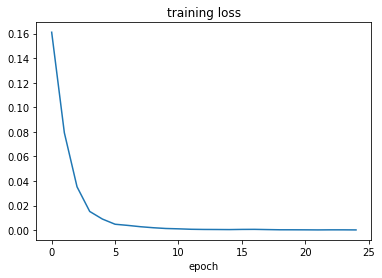

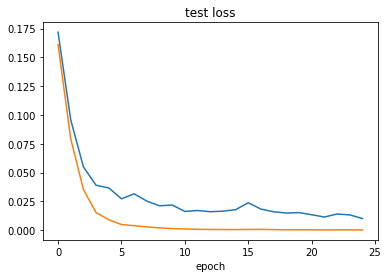

[[5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 2 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]] 0.9622641509433962
0.16091353828842575
0.18717378040529647
0.03651894981393943
0.05927364218909786
0.006891929500459417
0.03342460911228971
0.0022135792218299735
0.022960816633026553
0.0009985669119585607
0.020215233260730527
0.0006689920807509003
0.019635662155331305
0.00047644517837545355
0.018

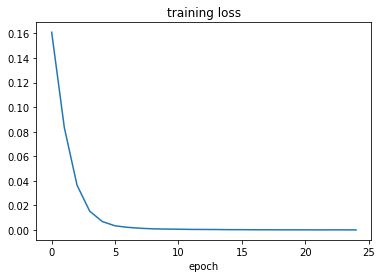

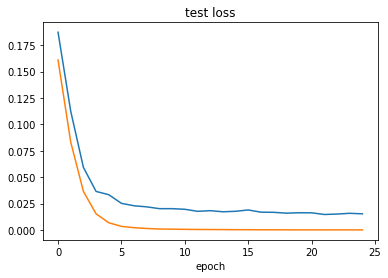

[[5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]] 0.9622641509433962
0.1566781810409314
0.16603625945325168
0.0337765027542372
0.049342154894235
0.00966954802641192
0.03003019038236366
0.0032779978953201222
0.021245308079809514
0.001620747202478752
0.01671987884449509
0.0010017197023812882
0.013203981068899046
0.0006141574829942672
0.01281865686

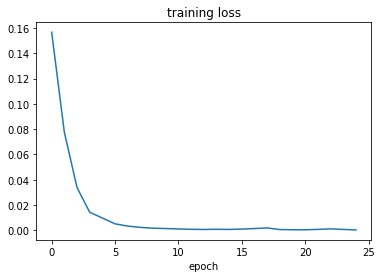

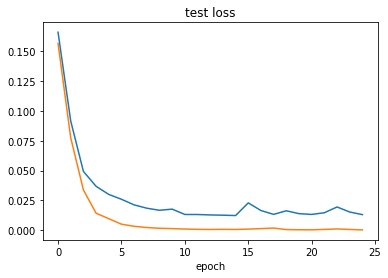

[[5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]] 0.9811320754716981


In [ ]:
in_ch=32
num_class=23
dataPath="/content/drive/My Drive/Colab Notebooks/RFMG/data/"+ExpVer

folds=RepeatedStratifiedKFold(n_splits=10, n_repeats=1,random_state=100).split(feature_all,label_all)
folds=StratifiedGroupKFold(n_splits=7).split(feature_2d_stft,label_all,caseNum_all)
for train_index, test_index in folds:
    test_ind=test_index
    train_ind=train_index


def test(X_all,y_all,opt):
  import torch
  torch.cuda.empty_cache()

  if __name__ == '__main__':
      
      
      batchsize_train = 16

      X_train=X_all[train_ind] 
      X_test=X_all[test_ind]
      y_train=y_all[train_ind] 
      y_test=y_all[test_ind]

      train_loader = DataLoader(TensorDataset(torch.Tensor(X_train), torch.Tensor(y_train)), batch_size=batchsize_train,shuffle=True)
      batchsize_test = 16
      test_loader = DataLoader(TensorDataset(torch.Tensor(X_test), torch.Tensor(y_test)), batch_size=batchsize_test, shuffle=False)
              
    
      #hyperparameter definition    
      learning_rate = 1e-4  #学习的速率 越小越精细
      momentum = 0.1
      random_seed=1
      torch.backends.cudnn.enabled = False
      torch.manual_seed(random_seed)     #设定随机数种子为固定值
      
      train_loss_epoch = []
      test_acc_epoch =[]
      total_acc_epoch = []
      #epoch_range = np.arange(25,225,25)
      epoch_range = np.array([2])

      
      #network = Net2().cuda()   # 2d cnn
        # 1d cnn
      if opt['net']=='stft':
          network = Net2_stft(in_ch,num_class).cuda()
      if opt['net']=='stft2':
          network = Net2_stft2(in_ch,num_class).cuda()
      if opt['net']=='stft3':
          network = Net2_stft3(in_ch,num_class).cuda()
      if opt['net']=='cwt':
          network = Net2_cwt(in_ch,num_class).cuda()
      if opt['net']=='cwt2':
          network = Net2_cwt(in_ch,num_class).cuda()
      if opt['net']=='1d':
          network = Net(in_ch,num_class).cuda()
      #training
      optimizer = optim.Adam(network.parameters(), lr=learning_rate)
      #optimizer = optim.SGD(network.parameters(), lr=0.01, momentum=0.9)
      

      #network.train()
      Training_Loss = []
      Test_Loss = []
      start_time = time.time()
      criterion = nn.CrossEntropyLoss()
      #criterion = nn.CrossEntropyLoss(weight=torch.Tensor([1, 3]).cuda())
      for epoch in range(25):   # loop over the dataset multiple times
          train_loss = 0
          for X, Y in train_loader:
              # X = X.view(-1,1,X.shape[2],X.shape[3]).cuda()
              X = X.float().cuda()  
              Y = Y.long().view(-1, ).cuda() 
              current_batchsize = X.shape[0]
              optimizer.zero_grad()
              output = network(X)
              loss = criterion(output,Y)
              train_loss = train_loss + loss.item()
              loss.backward()                     #calculate the gradient decent
              optimizer.step()                    #update the weight
              
            





          test_loss = 0
          correct = 0
          total = 0
          test_y= []
          test_y_p = []
          # sens = 0    # sensitivity = TP/(TP + FN)
          # prec = 0    # precision = TP/(TP + FP)
          with torch.no_grad():        
              # X = X.view(-1,X.shape[1],X.shape[2])
              # X = X.float()         
              for X, Y in test_loader:
                  X = torch.Tensor(X).cuda()
                  Y = torch.Tensor(Y).long().view(-1, ).cuda()
                  images, labels = X, Y
                  # calculate outputs by running images through the network
                  outputs = network(images)
                  loss = criterion(outputs,Y)
                  test_loss = test_loss + loss.item()

                  # the class with the highest energy is what we choose as prediction
                  _, predicted = torch.max(outputs.data, 1)
                  total += labels.size(0)
                  correct += (predicted == labels).sum().item()
                  
                  for i in range(len(labels)):
                    test_y.append(labels[i])
                    test_y_p.append(predicted[i])
          
          #print('Accuracy of test cases: %d %%' % (100 * correct / total))
  

          Training_Loss.append(train_loss/len(train_loader.dataset))
          Test_Loss.append(test_loss/len(test_loader.dataset))
          if epoch%2==0:
              print(train_loss/len(train_loader.dataset))
              print(test_loss/len(test_loader.dataset))
        
              
      # PATH=dataPath+"/model/"+opt['net']+".pt"
      # torch.save(network.state_dict(), PATH)
      # train_loss_epoch.append(Training_Loss[-1])
      # training_time=time.time()-start_time
      #print('total training time is',training_time)
      
      plt.figure()
      plt.plot(Training_Loss)
      plt.title("training loss")
      plt.xlabel("epoch")
      plt.show()

      plt.figure()
      plt.plot(Test_Loss)
      plt.title("test loss")
      plt.xlabel("epoch")
      plt.plot(Training_Loss)
      plt.show()

  test_y_p=torch.FloatTensor(test_y_p)
  test_y=torch.FloatTensor(test_y)
  test_y_p=np.array(test_y_p.cpu())
  test_y=np.array(test_y.cpu())
  test_y2=np.stack((test_y, test_y_p))



  cm=confusion_matrix(test_y, test_y_p)
  acc=accuracy_score(test_y, test_y_p)
  print(cm,acc)
  return cm,acc,test_y2

#cm,acc,test_y2=test(feature_2d_stft,label_all,{'net':'stft'})
#cm,acc,test_y2=test(feature_all,label_all,{'net':'1d'})
# cm1,acc1,test_y1=test(feature_2d_stft[:,:32,:,:],label_all,{'net':'stft'})
# cm2,acc2,test_y2=test(feature_2d_stft2[:,:32,:,:],label_all,{'net':'stft2'})
# cm3,acc3,test_y3=test(feature_2d_stft3[:,:32,:,:],label_all,{'net':'stft3'})
cm4,acc4,test_y4=test(feature_2d_cwt[:,:32,:,:],label_all,{'net':'cwt'})
cm5,acc5,test_y5=test(feature_2d_cwt2[:,:32,:,:],label_all,{'net':'cwt2'})
cm5,acc5,test_y5=test(feature_2d_cwt3[:,:32,:,:],label_all,{'net':'cwt'})

In [ ]:

y_ensemble=np.zeros([np.size(test_y1,axis=1),])
for i in range(np.size(test_y1,axis=1)):
  
  list=[test_y1[1,i],test_y2[1,i],test_y4[1,i],test_y5[1,i],test_y6[1,i]]
  
  (unique, counts) = np.unique(list, return_counts=True)

  label=unique[np.argmax(counts)]
  y_ensemble[i]=label


cm=confusion_matrix(test_y1[0,:], y_ensemble)
acc=accuracy_score(test_y1[0,:], y_ensemble)

print(acc,cm)

0.8932038834951457 [[10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  5  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  5  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  4  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  5  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  6  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  4  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  6  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  6  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  4  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  6  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  5  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  5  1  0  0]
 [ 0  0  0  0  0  0  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
ExpVer='2_9'
file_name_data=r"/content/drive/My Drive/Colab Notebooks/RFMG/data/"+ExpVer+"/data_all_multi6_filt_0.1_5.npz"
data=np.load(file_name_data)
feature_2d_stft=data['feature_2d_stft']
feature_2d_stft2=data['feature_2d_stft2']
feature_2d_cwt=data['feature_2d_cwt']
feature_2d_cwt2=data['feature_2d_cwt2']
feature_2d_cwt3=data['feature_2d_cwt3']
feature_all=data['feature_all']
label_all=data['label_all']
caseNum_all=data['caseNum_all']

Mounted at /content/drive


In [ ]:
# in_ch: CNN input channel number 
# num_class: classification number  8,5,3 
# opt CV method. groupKfold: kfold, all cases not been seen in training set  
# Kfold : randomly kfold. label and cases equally distributed
# group: leave one case out 
    
def kFCV(X_all,y_all,in_ch,num_class,opt,case,del_case):


   
   
    cm_all=[]
    acc_all=[]
    y_test_all=[]
    y_p_all=[]
    test_ind_all=[]
    
    case=case.flatten()
    idx=[]
    if del_case:
       for i in del_case:
           temp=np.where(caseNum_all==i)[0]
    
           for i in range(len(temp)):
             idx.append(temp[i])
 
       idx=np.array(idx).flatten()
     
       case=np.delete(case,idx)
       y_all=np.delete(y_all,idx)
       X_all=np.delete(X_all,idx,axis=0)

    if opt['method']=='groupKfold':
        folds=StratifiedGroupKFold(n_splits=k).split(X_all,y_all,case)
    if opt['method']=='Kfold':
        folds=RepeatedStratifiedKFold(n_splits=k, n_repeats=n_re,random_state=0).split(X_all,y_all)
    if opt['method']=='group':  
        logo = LeaveOneGroupOut()
        logo.get_n_splits(X_all,y_all,case)
        logo.get_n_splits(groups=case) 
        folds=logo.split(X_all,y_all,case)

    for train_ind, test_ind in folds:
           
       
        X_train=X_all[train_ind] 
        X_test=X_all[test_ind]
        y_train=y_all[train_ind] 
        y_test=y_all[test_ind]
        #print(train_ind,test_ind)
        

        for i in range(len(test_ind)):
            test_ind_all.append(test_ind[i])

        (unique, counts) = np.unique(case[test_ind], return_counts=True)
        frequencies = np.asarray((unique, counts)).T
        print(frequencies)

        batchsize_train = 16
        train_loader = DataLoader(TensorDataset(torch.Tensor(X_train), torch.Tensor(y_train)), batch_size=batchsize_train,shuffle=True)
        batchsize_test = 16
        test_loader = DataLoader(TensorDataset(torch.Tensor(X_test), torch.Tensor(y_test)), batch_size=batchsize_test, shuffle=False)
                
        
        n_epoch=25
        learning_rate = 1e-4  #学习的速率 越小越精细
        momentum = 0.1
        random_seed=1
        torch.backends.cudnn.enabled = False
        torch.manual_seed(random_seed)     #设定随机数种子为固定值
        
        train_loss_epoch = []
        test_acc_epoch =[]
        total_acc_epoch = []
        #epoch_range = np.arange(25,225,25)
        epoch_range = np.array([2])

        
        
        if opt['trans']==0:       
          if opt['net']=='stft':
            network = Net2_stft(in_ch,num_class).cuda()
          if opt['net']=='stft2':
            network = Net2_stft2(in_ch,num_class).cuda()
          if opt['net']=='cwt':
            network = Net2_cwt(in_ch,num_class).cuda()
          if opt['net']=='1d':
            network = Net(in_ch,num_class).cuda()

        if opt['trans']==1:       
          if opt['net']=='stft':
            network = Net2_stft_trans.cuda()
          if opt['net']=='stft2':
            network = Net2_stft2_trans.cuda()
          if opt['net']=='cwt':
            network = Net2_cwt_trans.cuda()
          if opt['net']=='1d':
            network = Net_trans.cuda()
        
          for param in network.parameters():
            param.requires_grad = False

          network.fc1 = nn.Linear(network.fc1.in_features, network.fc2.in_features)
          network.fc2 = nn.Linear(network.fc2.in_features, num_class)
          network = network.cuda()
          
        #training
        optimizer = optim.Adam(network.parameters(), lr=learning_rate)
        
        
        
        #network.train()
        Training_Loss = []
        Test_Loss = []
        start_time = time.time()
        criterion = nn.CrossEntropyLoss()
        for epoch in range(n_epoch):   # loop over the dataset multiple times
            train_loss = 0
            for X, Y in train_loader:
                
                X = X.float().cuda()  
                Y = Y.long().view(-1, ).cuda() 
                current_batchsize = X.shape[0]
                optimizer.zero_grad()
                output = network(X)
                loss = criterion(output,Y)
                train_loss = train_loss + loss.item()
                loss.backward()                     #calculate the gradient decent
                optimizer.step()                    #update the weight
                

            test_loss = 0
            correct = 0
            total = 0
            test_y= []
            test_y_p = []
            
            # sens = 0    # sensitivity = TP/(TP + FN)
            # prec = 0    # precision = TP/(TP + FP)
            with torch.no_grad():        
                # X = X.view(-1,X.shape[1],X.shape[2])
                # X = X.float()         
                for X, Y in test_loader:
                    X = torch.Tensor(X).cuda()
                    Y = torch.Tensor(Y).long().view(-1, ).cuda()
                    images, labels = X, Y
                    # calculate outputs by running images through the network
                    outputs = network(images)
                    loss = criterion(outputs,Y)
                    test_loss = test_loss + loss.item()

                    # the class with the highest energy is what we choose as prediction
                    _, predicted = torch.max(outputs.data, 1)
                    total += labels.size(0)
                    correct += (predicted == labels).sum().item()
                    
                    for i in range(len(labels)):
                      test_y.append(labels[i])
                      test_y_p.append(predicted[i])
                      

            Training_Loss.append(train_loss/len(train_loader.dataset))
            Test_Loss.append(test_loss/len(test_loader.dataset))
            # if epoch%(n_epoch-1)==0:
            #     print(train_loss/len(train_loader.dataset))
            #     print(test_loss/len(test_loader.dataset))
      
        train_loss_epoch.append(Training_Loss[-1])
        test_y_p=torch.FloatTensor(test_y_p)
        test_y=torch.FloatTensor(test_y)
     
        y_p=np.array(test_y_p.cpu())
        y=np.array(test_y.cpu())
        

        cm=confusion_matrix(y, y_p)
        acc=accuracy_score(y, y_p)
        
        cm_all.append(cm)
        acc_all.append(acc)
        for i in range(len(y_p)):
            y_p_all.append(y_p[i])
            y_test_all.append(y_test[i])
        print(acc) 


    acc_all=np.array(acc_all)
    cm_all=np.array(cm_all)
    y_test_all=np.array(y_test_all)
    y_p_all=np.array(y_p_all)
    y=np.stack((y_test_all, y_p_all))
    
    test_ind_all=np.array(test_ind_all)

    cm=confusion_matrix(y_test_all, y_p_all)

    acc=accuracy_score(y_test_all, y_p_all)
    


    print(acc) 
    print(cm)
    return cm,cm_all,acc,acc_all,y,test_ind_all

In [ ]:
m1='Kfold'
m2='groupKfold'
m3='group'
m=m1
a=0
opt1={'method':m,'net':'stft','trans':a}
opt2={'method':m,'net':'stft2','trans':a}
opt3={'method':m,'net':'cwt','trans':a}
opt4={'method':m,'net':'1d','trans':a}

b=0
opt10={'method':m,'net':'stft','trans':b}
opt20={'method':m,'net':'stft2','trans':b}
opt30={'method':m,'net':'cwt','trans':b}
opt40={'method':m,'net':'1d','trans':b}

[[ 1.  4.]
 [ 2.  9.]
 [ 3.  6.]
 [ 4.  9.]
 [ 5.  3.]
 [ 6.  8.]
 [ 7. 10.]
 [ 8.  6.]
 [ 9. 10.]
 [10. 10.]
 [11.  8.]
 [12.  8.]
 [13. 13.]
 [14.  5.]
 [15.  7.]]
0.9741379310344828
[[ 1. 11.]
 [ 2. 10.]
 [ 3.  6.]
 [ 4.  7.]
 [ 5.  6.]
 [ 6.  5.]
 [ 7.  7.]
 [ 8.  6.]
 [ 9.  9.]
 [10.  9.]
 [11.  7.]
 [12.  9.]
 [13. 10.]
 [14.  9.]
 [15.  5.]]
0.9827586206896551
[[ 1. 11.]
 [ 2.  7.]
 [ 3.  6.]
 [ 4.  7.]
 [ 5.  9.]
 [ 6. 10.]
 [ 7.  6.]
 [ 8. 12.]
 [ 9.  5.]
 [10.  3.]
 [11.  8.]
 [12.  8.]
 [13.  9.]
 [14.  8.]
 [15.  7.]]
0.8793103448275862
[[ 1.  6.]
 [ 2.  4.]
 [ 3. 15.]
 [ 4.  9.]
 [ 5.  5.]
 [ 6.  9.]
 [ 7.  5.]
 [ 8.  8.]
 [ 9.  6.]
 [10.  8.]
 [11.  9.]
 [12. 10.]
 [13.  6.]
 [14. 10.]
 [15.  6.]]
0.896551724137931
[[ 1. 10.]
 [ 2.  5.]
 [ 3.  8.]
 [ 4.  7.]
 [ 5. 14.]
 [ 6. 10.]
 [ 7.  5.]
 [ 8.  5.]
 [ 9.  5.]
 [10.  9.]
 [11.  6.]
 [12.  8.]
 [13.  6.]
 [14.  7.]
 [15. 10.]]
0.9478260869565217
[[ 1.  6.]
 [ 2. 10.]
 [ 3.  8.]
 [ 4.  2.]
 [ 5.  6.]
 [ 6.  6.]
 [ 7.  8.]

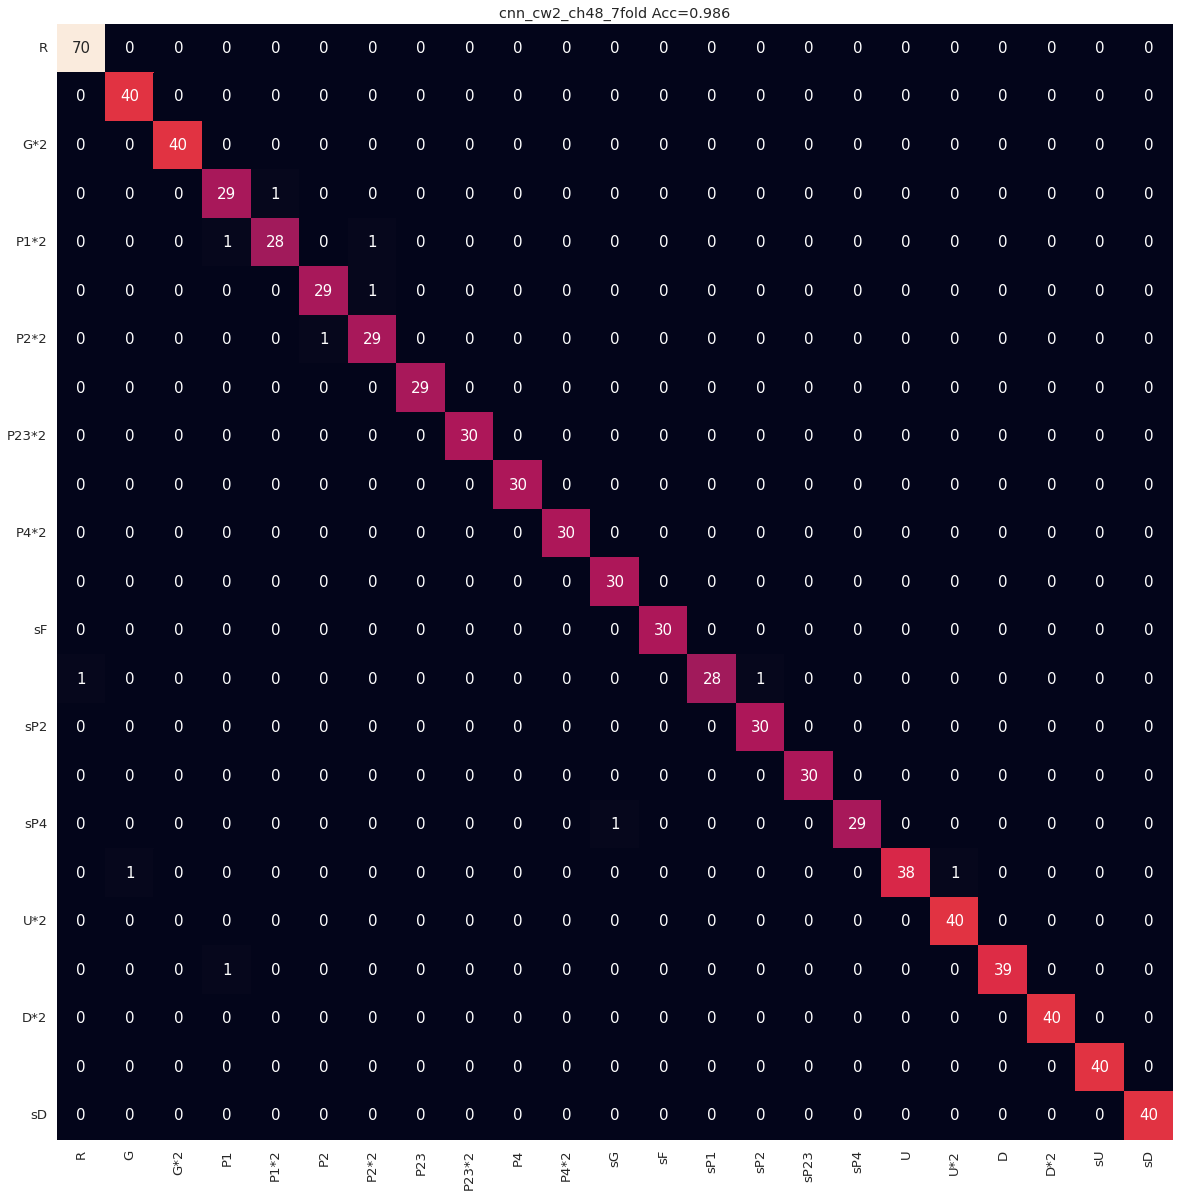

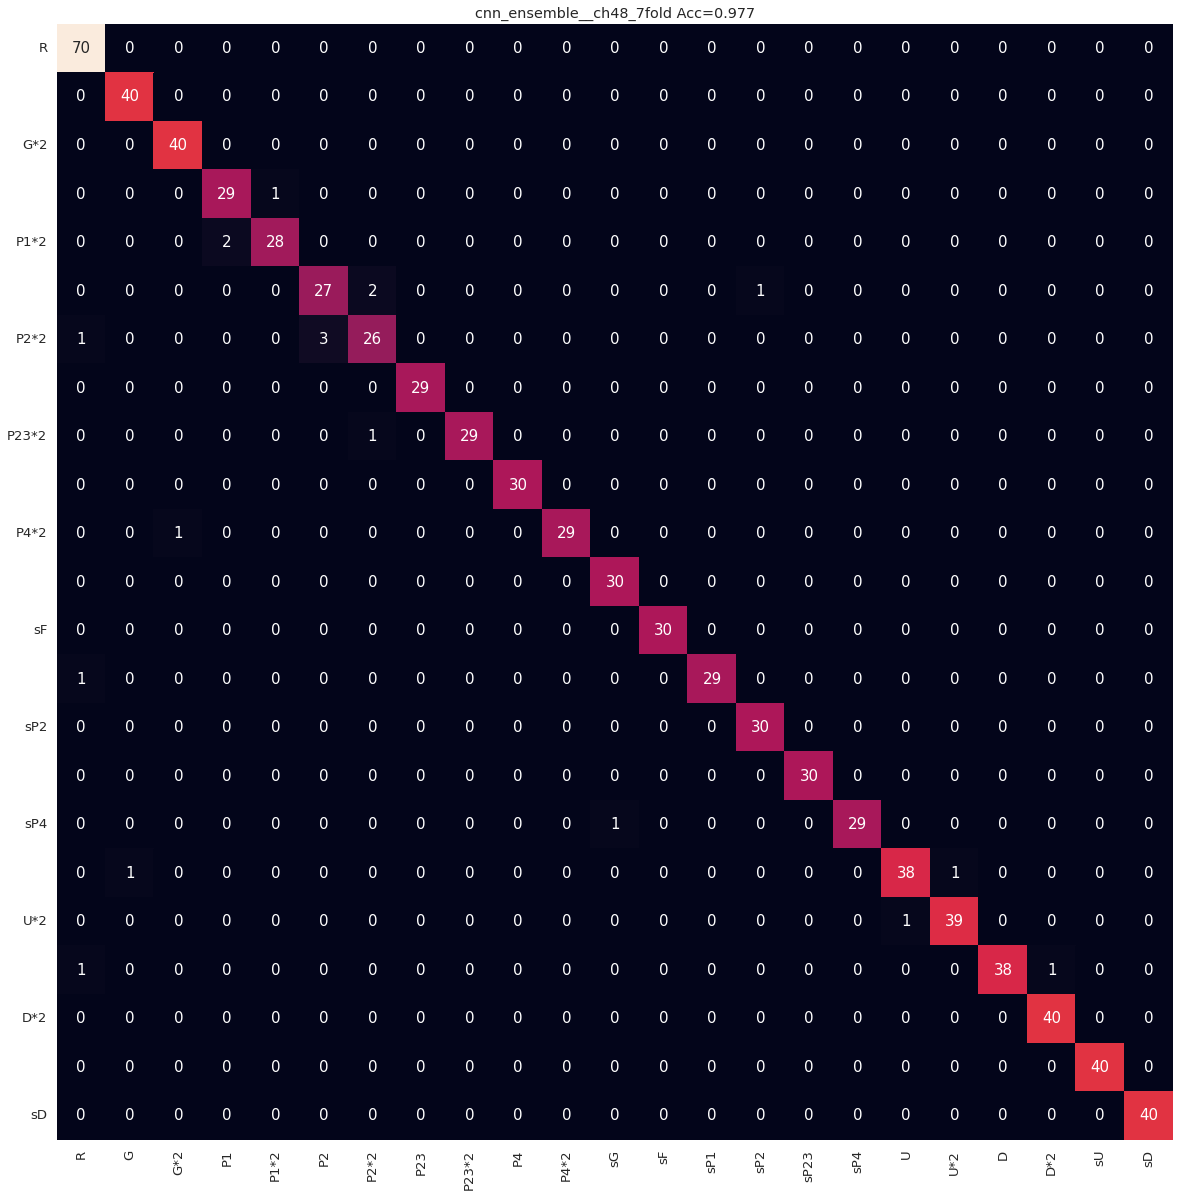

In [ ]:
#feature_2d_del=stft_2d(feature_all_del)


self_channel=[0,1,10,11,20,21,30,31]
channel=np.linspace(0,31,32).astype(int) 
channel=np.linspace(0,47,48).astype(int) 
#channel=self_channel
in_ch=48
num_class=23
k=7
del_case=[]
n_re=1

if __name__ == '__main__':
  
    cm1,cm_all1,acc1,acc_all1,y1,test_ind_all1=kFCV(feature_2d_stft[:,channel,:,:],label_all,in_ch,num_class,opt=opt1,case=caseNum_all,del_case=del_case)
    cm2,cm_all2,acc2,acc_all2,y2,test_ind_all2=kFCV(feature_2d_stft2[:,channel,:,:],label_all,in_ch,num_class,opt=opt2,case=caseNum_all,del_case=del_case)
    cm3,cm_all3,acc3,acc_all3,y3,test_ind_all3=kFCV(feature_2d_cwt[:,channel,:,:],label_all,in_ch,num_class,opt=opt3,case=caseNum_all,del_case=del_case)
    cm4,cm_all4,acc4,acc_all4,y4,test_ind_all4=kFCV(feature_2d_cwt2[:,channel,:,:],label_all,in_ch,num_class,opt=opt3,case=caseNum_all,del_case=del_case)
    cm6,cm_all6,acc6,acc_all6,y6,test_ind_all6=kFCV(feature_all[:,channel,:],label_all,in_ch,num_class,opt=opt4,case=caseNum_all,del_case=del_case)
    cm5,cm_all5,acc5,acc_all5,y5,test_ind_all5=kFCV(feature_2d_cwt2[:,channel,:],label_all,in_ch,num_class,opt=opt3,case=caseNum_all,del_case=del_case)


y_ensemble=np.zeros([np.size(y1,axis=1),])
for i in range(np.size(y1,axis=1)):
  
  list=[y1[1,i],y3[1,i],y2[1,i],y4[1,i],y5[1,i],y6[1,i]]
  (unique, counts) = np.unique(list, return_counts=True)

  label=unique[np.argmax(counts)]
  y_ensemble[i]=label


cm=confusion_matrix(y1[0,:], y_ensemble)
acc=accuracy_score(y1[0,:], y_ensemble)

print(acc,cm)
plotfigFullClass(cm4,acc4,'cnn_cw2_ch48_7fold')
plotfigFullClass(cm,acc,'cnn_ensemble__ch48_7fold')
np.savez_compressed("/content/drive/My Drive/Colab Notebooks/RFMG/data/1_24/result/npyFile/cnn_ch48_7fold.npz",\
                    cm1=cm1,cm_all1=cm_all1,acc1=acc1,acc_all1=acc_all1,y1=y1,\
                    cm2=cm2,cm_all2=cm_all2,acc2=acc2,acc_all2=acc_all2,y2=y2,\
                    cm3=cm3,cm_all3=cm_all3,acc3=acc3,acc_all3=acc_all3,y3=y3,\
                    cm4=cm4,cm_all4=cm_all4,acc4=acc4,acc_all4=acc_all4,y4=y4,\
                    cm5=cm5,cm_all5=cm_all5,acc5=acc5,acc_all5=acc_all5,y5=y5,\
                    y_ensemble=y_ensemble,acc=acc,cm=cm)

In [ ]:
y_ensemble=np.zeros([np.size(y1,axis=1),])
for i in range(np.size(y1,axis=1)):
  
  list=[y1[1,i],y3[1,i],y2[1,i],y4[1,i],y5[1,i],y6[1,i]]
  (unique, counts) = np.unique(list, return_counts=True)

  label=unique[np.argmax(counts)]
  y_ensemble[i]=label


cm=confusion_matrix(y1[0,:], y_ensemble)
acc=accuracy_score(y1[0,:], y_ensemble)

print(acc,cm)
# plotfigFullClass(cm4,acc4,'ch32_cwt2_morlet_group7fold')
# plotfigFullClass(cm,acc,'ch32_2d_ensemble4_group7fold')
# np.savez_compressed("/content/drive/My Drive/Colab Notebooks/RFMG/data/"+ExpVer+"/result/npyFile/ch32_7fold_ensemble.npz",\
#                     cm1=cm1,cm_all1=cm_all1,acc1=acc1,acc_all1=acc_all1,y1=y1,\
#                     cm2=cm2,cm_all2=cm_all2,acc2=acc2,acc_all2=acc_all2,y2=y2,\
#                     cm3=cm3,cm_all3=cm_all3,acc3=acc3,acc_all3=acc_all3,y3=y3,\
#                     cm4=cm4,cm_all4=cm_all4,acc4=acc4,acc_all4=acc_all4,y4=y4,\
#                     y_ensemble=y_ensemble,acc=acc,cm=cm)

0.9116279069767442 [[53  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 30  0  1  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2 28  0  0  0  0  0  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  1 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  1  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 23  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  3  0  0  0  0  0 18  0  2  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 24  

In [ ]:
parent_dir = r"/content/drive/My Drive/Colab Notebooks/RFMG/data/"+ExpVer+"/result/"
path1 = os.path.join(parent_dir, 'cm_fig')
os.makedirs(path1, exist_ok = True) 
path1 = os.path.join(parent_dir, 'npyFile')
os.makedirs(path1, exist_ok = True) 

def plotfigFullClass(cm,acc,tle):

    labelNum=str(1)  #labelling method 1,2,3,4
    size=15
    name1=["R", "G","G*2","P1","P1*2","P2","P2*2","P23","P23*2","P4","P4*2","sG","sF","sP1","sP2","sP23","sP4","U","U*2","D","D*2","sU","sD"]
    name2=name1
    w=20 #fig size 1      change when label num change
    h=22   #fig size 2
    
    true_num=0
    for i in range (len(cm)):
      true_num=true_num+ cm[i,i]
    acc=true_num/np.sum(cm)   
    
    df_cm = pd.DataFrame(cm, index=name1, columns=name2)
    plt.rcParams["font.family"] = "Times New Roman"
    plt.figure()
    sn.set(font_scale=1.2)
    sn.heatmap(df_cm, annot=True,fmt="d",square=True,cbar=False,annot_kws={"size": size,'fontsize':15})
 
    s01=' Acc={n:.3f}'.format(n=acc)
    #plt.text(a,b,s01,fontsize=size)
    
    tleSave=tle
    plt.title(tle+s01)

    figure = plt.gcf()
    figure.set_size_inches(w, h)
    
    plt.savefig(parent_dir+r"cm_fig/"+tleSave+"CM.png", dpi=300)

#plotfigFullClass(cm4,acc4,'ch32_cwt2_morlet_group7fold')
#plotfigFullClass(cm,acc,'ch8_2d_ensemble6_group7fold')
#plotfigFullClass(cm3,acc3,'featSTFT2d_Kfold')
